In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

japan_stocks = [
    '7203.T', '6758.T', '8306.T', '9984.T', '7267.T',  # Toyota, Sony, Mitsubishi UFJ, SoftBank, Honda
    '7201.T', '7751.T', '6752.T', '6501.T', '9432.T',  # Nissan, Canon, Panasonic, Hitachi, NTT
    '9433.T', '8031.T', '8316.T', '6861.T', '4502.T'   # KDDI, Mitsui, Sumitomo Mitsui, Keyence, Takeda
]

uk_stocks = [
    'ULVR.L', 'BP.L', 'HSBA.L', 'GSK.L',  # Unilever, BP, HSBC, GSK
    'AZN.L', 'DGE.L', 'BARC.L', 'VOD.L', 'BATS.L',  # AstraZeneca, Diageo, Barclays, Vodafone, BAT
    'TSCO.L', 'LLOY.L', 'NG.L', 'RIO.L', 'RR.L'     # Tesco, Lloyds, National Grid, Rio Tinto, Rolls-Royce
]

# Define the ticker for the GBP/JPY exchange rate
exchange_rate = 'GBPJPY=X'

# Download the data
start_date = '2020-01-01'
end_date = '2023-12-31'

japan_data = yf.download(japan_stocks, start=start_date, end=end_date)['Close']
uk_data = yf.download(uk_stocks, start=start_date, end=end_date)['Adj Close']
exchange_rate_data = yf.download(exchange_rate, start=start_date, end=end_date)['Adj Close']

# Combine the data into a single DataFrame
all_data = pd.concat([japan_data, uk_data, exchange_rate_data], axis=1)


[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  14 of 14 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
# Calculate the daily returns
returns = all_data.pct_change()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Extract correlations with GBP/JPY exchange rate
gbpjpy_correlation = correlation_matrix["Adj Close"]

In [27]:
returns.corr()

,4502.T,6501.T,6752.T,6758.T,6861.T,7201.T,7203.T,7267.T,7751.T,8031.T,...,GSK.L,HSBA.L,LLOY.L,NG.L,RIO.L,RR.L,TSCO.L,ULVR.L,VOD.L,Adj Close
4502.T,1.000000,0.465293,0.388214,0.357615,0.322984,0.350790,0.417110,0.419812,0.374404,0.396264,...,0.118869,0.107143,0.162667,0.078059,0.095489,0.105998,0.015761,0.067333,0.154793,0.232518
6501.T,0.465293,1.000000,0.569983,0.482134,0.446426,0.504541,0.563774,0.582789,0.481073,0.562496,...,0.157037,0.188963,0.256568,0.139227,0.191554,0.181695,0.109265,0.070587,0.196120,0.300589
6752.T,0.388214,0.569983,1.000000,0.496887,0.420810,0.510770,0.524947,0.580204,0.404372,0.465463,...,0.106082,0.200043,0.203743,0.118295,0.164366,0.137724,0.107387,0.096861,0.189024,0.234469
6758.T,0.357615,0.482134,0.496887,1.000000,0.521275,0.421059,0.507443,0.453169,0.343342,0.402420,...,0.049607,0.111396,0.152347,0.076739,0.126776,0.092364,0.089868,0.028734,0.117745,0.195210
6861.T,0.322984,0.446426,0.420810,0.521275,1.000000,0.288678,0.407171,0.365261,0.288432,0.344741,...,0.069086,0.094425,0.116023,0.108479,0.123249,0.085482,0.109253,0.080816,0.121299,0.198694
7201.T,0.350790,0.504541,0.510770,0.421059,0.288678,1.000000,0.642428,0.704322,0.500345,0.513353,...,0.079777,0.221773,0.240733,0.127353,0.127925,0.173564,0.105785,0.085010,0.179913,0.305794
7203.T,0.417110,0.563774,0.524947,0.507443,0.407171,0.642428,1.000000,0.697755,0.452516,0.572529,...,0.082273,0.194061,0.233225,0.130614,0.132486,0.151660,0.105238,0.111267,0.188347,0.280052
7267.T,0.419812,0.582789,0.580204,0.453169,0.365261,0.704322,0.697755,1.000000,0.505437,0.582540,...,0.125402,0.243123,0.278469,0.149653,0.163748,0.245260,0.109045,0.098930,0.187750,0.311520
7751.T,0.374404,0.481073,0.404372,0.343342,0.288432,0.500345,0.452516,0.505437,1.000000,0.437476,...,0.137491,0.196549,0.213185,0.119413,0.118019,0.156161,0.051528,0.110831,0.151535,0.225956
8031.T,0.396264,0.562496,0.465463,0.402420,0.344741,0.513353,0.572529,0.582540,0.437476,1.000000,...,0.091538,0.197051,0.191269,0.083670,0.203954,0.173662,0.070474,0.080277,0.164510,0.288825


Correlations with GBP/JPY exchange rate:
ULVR.L      -0.070292
AZN.L       -0.059373
GSK.L       -0.052290
RIO.L       -0.027513
BATS.L      -0.026331
TSCO.L      -0.020812
VOD.L       -0.019297
HSBA.L      -0.011994
DGE.L       -0.005849
NG.L         0.012518
BP.L         0.030950
RR.L         0.049771
BARC.L       0.053139
LLOY.L       0.094663
9432.T       0.131681
9433.T       0.154498
6758.T       0.195210
6861.T       0.198694
7751.T       0.225956
9984.T       0.228749
4502.T       0.232518
6752.T       0.234469
8306.T       0.241170
8316.T       0.247161
7203.T       0.280052
8031.T       0.288825
6501.T       0.300589
7201.T       0.305794
7267.T       0.311520
Adj Close    1.000000
Name: Adj Close, dtype: float64


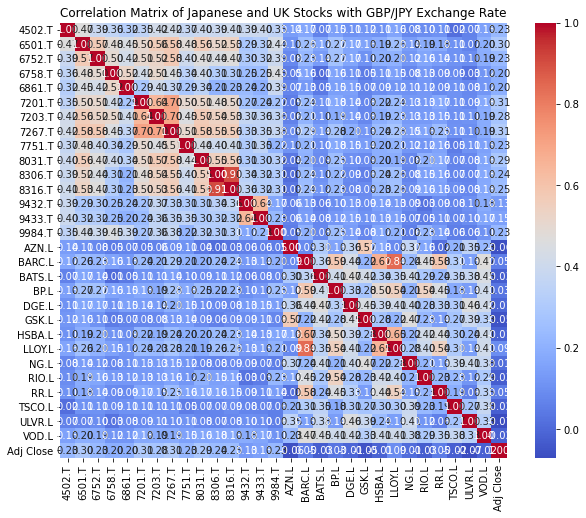

In [28]:
import seaborn as sns

print("Correlations with GBP/JPY exchange rate:")
print(gbpjpy_correlation.sort_values())

# Visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Japanese and UK Stocks with GBP/JPY Exchange Rate')
plt.show()

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Define the lists of Japanese and UK stocks
japan_stocks = [
    '7203.T', '6758.T', '8306.T', '9984.T', '7267.T',  # Toyota, Sony, Mitsubishi UFJ, SoftBank, Honda
    '7201.T', '7751.T', '6752.T', '6501.T', '9432.T',  # Nissan, Canon, Panasonic, Hitachi, NTT
    '9433.T', '8031.T', '8316.T', '6861.T', '4502.T',  # KDDI, Mitsui, Sumitomo Mitsui, Keyence, Takeda
    '2914.T', '4063.T', '4568.T', '8035.T',   # Japan Tobacco, Shin-Etsu, Daiichi Sankyo, Tokyo Electron, NTT DOCOMO
    '8604.T', '8058.T', '8001.T', '6503.T'             # Nomura, Mitsubishi Corp, Itochu, Mitsubishi Electric
]

uk_stocks = [
    'ULVR.L', 'BP.L', 'HSBA.L', 'GSK.L',  # Unilever, BP, HSBC, GSK
    'AZN.L', 'DGE.L', 'BARC.L', 'VOD.L', 'BATS.L',  # AstraZeneca, Diageo, Barclays, Vodafone, BAT
    'TSCO.L', 'LLOY.L', 'NG.L', 'RIO.L', 'RR.L',    # Tesco, Lloyds, National Grid, Rio Tinto, Rolls-Royce
    'PRU.L', 'SN.L', 'EXPN.L',    # Prudential, Royal Dutch Shell, Reckitt Benckiser, Smith & Nephew, Experian
     'IAG.L', 'AV.L', 'AAL.L', 'CPG.L'       # BT Group, IAG, Aviva, Anglo American, Compass Group
]

# Define the ticker for the GBP/JPY exchange rate
exchange_rate = 'GBPJPY=X'

# Download the data
start_date = '2020-01-01'
end_date = '2023-12-31'

japan_data = yf.download(japan_stocks, start=start_date, end=end_date)['Close']
uk_data = yf.download(uk_stocks, start=start_date, end=end_date)['Adj Close']
exchange_rate_data = yf.download(exchange_rate, start=start_date, end=end_date)['Adj Close']

# Combine the data into a single DataFrame
all_data = pd.concat([japan_data, uk_data, exchange_rate_data], axis=1)
# Calculate the daily returns
returns = all_data.pct_change()



[*********************100%***********************]  23 of 23 completed
[*********************100%***********************]  21 of 21 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
# Calculate shifted returns
returns_lag1 = returns.shift(1)
returns_lag2 = returns.shift(2)

# Add suffix to columns for clarity
returns_lag1 = returns_lag1.add_suffix('_lag1')
returns_lag2 = returns_lag2.add_suffix('_lag2')

# Combine the original and lagged returns
combined_returns = pd.concat([returns, returns_lag1, returns_lag2], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_returns.corr()

# Extract correlations with GBP/JPY exchange rate
gbpjpy_correlation = correlation_matrix["Adj Close"]

print("Correlations with GBP/JPY exchange rate:")
print(gbpjpy_correlation.sort_values())

# # Visualize the correlations
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix of Japanese and UK Stocks with GBP/JPY Exchange Rate')
# plt.show()


Correlations with GBP/JPY exchange rate:
ULVR.L_lag2   -0.076410
ULVR.L        -0.070293
AZN.L         -0.059373
8058.T_lag2   -0.054420
GSK.L         -0.052290
                 ...   
6501.T         0.300589
7201.T         0.305794
BARC.L_lag1    0.308820
7267.T         0.311520
Adj Close      1.000000
Name: Adj Close, Length: 135, dtype: float64


In [8]:
correlation_matrix[]

,2914.T,4063.T,4502.T,4568.T,6501.T,6503.T,6752.T,6758.T,6861.T,7201.T,...,LLOY.L_lag2,NG.L_lag2,PRU.L_lag2,RIO.L_lag2,RR.L_lag2,SN.L_lag2,TSCO.L_lag2,ULVR.L_lag2,VOD.L_lag2,Adj Close_lag2
2914.T,1.000000,0.347402,0.409677,0.252094,0.459609,0.441087,0.395092,0.312943,0.269889,0.423042,...,0.004945,-0.035109,-0.012305,-0.028955,-0.002642,-0.034611,-0.005910,-0.016746,0.025195,0.013174
4063.T,0.347402,1.000000,0.406666,0.356595,0.555855,0.509412,0.554039,0.545284,0.593057,0.414526,...,0.022585,-0.050755,0.019213,-0.005319,-0.015357,0.043042,-0.056198,-0.047386,-0.023514,0.024563
4502.T,0.409677,0.406666,1.000000,0.401024,0.465293,0.429198,0.388214,0.357615,0.322984,0.350790,...,0.015186,-0.067296,0.048127,0.017024,0.018224,0.045523,0.003082,-0.000619,0.084739,0.005245
4568.T,0.252094,0.356595,0.401024,1.000000,0.293908,0.314513,0.315839,0.323206,0.331827,0.187569,...,0.027096,-0.003737,0.044166,0.029428,0.058125,0.006327,-0.005779,0.054757,0.050840,-0.044583
6501.T,0.459609,0.555855,0.465293,0.293908,1.000000,0.602048,0.569983,0.482134,0.446426,0.504541,...,0.058601,-0.111960,0.061046,-0.024683,0.027551,0.065574,-0.069126,-0.057737,-0.013271,0.034973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN.L_lag2,-0.034611,0.043042,0.045523,0.006327,0.065574,0.022232,0.045320,0.041440,0.032166,0.017308,...,0.397012,0.303263,0.502685,0.275225,0.341295,1.000000,0.232370,0.300356,0.330971,0.035681
TSCO.L_lag2,-0.005910,-0.056198,0.003082,-0.005779,-0.069126,-0.011360,-0.062429,-0.055339,-0.009300,-0.010240,...,0.305092,0.391795,0.290792,0.233076,0.194562,0.232370,1.000000,0.274101,0.379733,-0.020550
ULVR.L_lag2,-0.016746,-0.047386,-0.000619,0.054757,-0.057737,-0.045045,-0.017153,-0.015793,-0.020201,-0.006556,...,0.143953,0.405564,0.228002,0.116937,0.062010,0.300356,0.274101,1.000000,0.328384,-0.070385
VOD.L_lag2,0.025195,-0.023514,0.084739,0.050840,-0.013271,0.002784,0.022864,-0.043929,0.025690,0.024258,...,0.413201,0.377447,0.453139,0.294789,0.345946,0.330971,0.379733,0.328384,1.000000,-0.019188


In [11]:
# Define the ticker for the GBP/JPY exchange rate and BARC.L
exchange_rate = 'GBPJPY=X'
barc_stock = 'BARC.L'

# Download the data
start_date = '2022-01-01'
end_date = '2023-12-31'

barc_data = yf.download(barc_stock, start=start_date, end=end_date)['Adj Close']
exchange_rate_data = yf.download(exchange_rate, start=start_date, end=end_date)['Adj Close']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


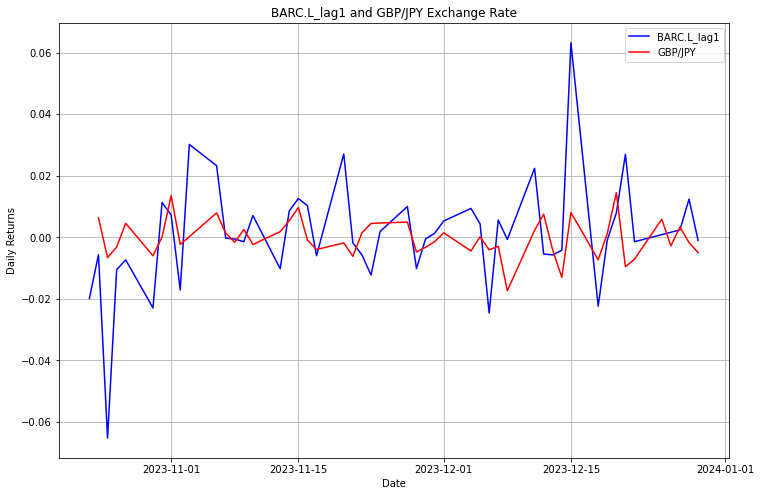

In [16]:
# Calculate the daily returns
barc_returns = barc_data[-50:].pct_change().shift(1)  # lagged by 1 day
exchange_rate_returns = exchange_rate_data[-50:].pct_change()

# Plot the data
plt.figure(figsize=(12, 8))

plt.plot(barc_returns, label='BARC.L_lag1', color='blue')
plt.plot(exchange_rate_returns, label='GBP/JPY', color='red')

plt.title('BARC.L_lag1 and GBP/JPY Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)

plt.show()

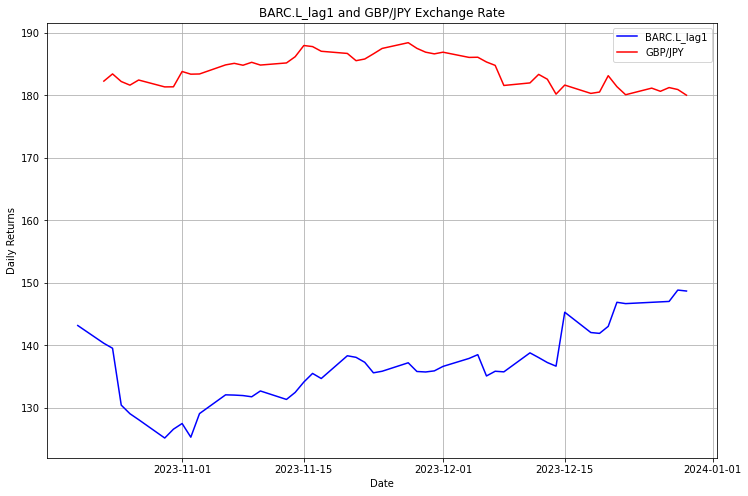

In [17]:
# Calculate the daily returns
barc_returns = barc_data[-50:].shift(1)  # lagged by 1 day
exchange_rate_returns = exchange_rate_data[-50:]

# Plot the data
plt.figure(figsize=(12, 8))

plt.plot(barc_returns, label='BARC.L_lag1', color='blue')
plt.plot(exchange_rate_returns, label='GBP/JPY', color='red')

plt.title('BARC.L_lag1 and GBP/JPY Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)

plt.show()

In [18]:
# Combine only the lagged returns
combined_lagged_returns = pd.concat([returns_lag1, returns_lag2], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_lagged_returns.corr()

# Extract correlations with GBP/JPY exchange rate lagged columns
gbpjpy_correlation_lag1 = correlation_matrix["Adj Close_lag1"]
gbpjpy_correlation_lag2 = correlation_matrix["Adj Close_lag2"]

print("Correlations with GBP/JPY exchange rate (lagged 1 day):")
print(gbpjpy_correlation_lag1.sort_values())

print("\nCorrelations with GBP/JPY exchange rate (lagged 2 days):")
print(gbpjpy_correlation_lag2.sort_values())

Correlations with GBP/JPY exchange rate (lagged 1 day):
ULVR.L_lag1      -0.070519
AZN.L_lag1       -0.059297
GSK.L_lag1       -0.052748
RIO.L_lag1       -0.027668
BATS.L_lag1      -0.026050
                    ...   
6501.T_lag1       0.300650
7201.T_lag1       0.306040
BARC.L_lag2       0.308880
7267.T_lag1       0.312106
Adj Close_lag1    1.000000
Name: Adj Close_lag1, Length: 90, dtype: float64

Correlations with GBP/JPY exchange rate (lagged 2 days):
ULVR.L_lag2      -0.070385
AZN.L_lag2       -0.059230
GSK.L_lag2       -0.052591
RIO.L_lag1       -0.035055
8604.T_lag1      -0.031256
                    ...   
8031.T_lag2       0.288718
6501.T_lag2       0.300610
7201.T_lag2       0.306027
7267.T_lag2       0.312083
Adj Close_lag2    1.000000
Name: Adj Close_lag2, Length: 90, dtype: float64
